This is a small project to practice Data Manipulation with Pandas

# Contents

1. Getting the data
2.  Top 5 most popular male and female name before 2000 and after 2000
3. Total births by sex and year
4. Proportions of Births
5. Analyzing Naming Trends
6. Babies named Kevin Over Time
7. Measuring the increase in naming diversity

# 1.Getting the data

In [50]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
pd.options.display.max_rows = 20

The United States Social Security Administration (SSA) has made available data on
the frequency of baby names from 1880 through the present. This is a good opportunity to practice data manipulation with
pandas to answer questions about this dataset.
Here is the dataset's [source ](https://www.ssa.gov/oact/babynames/limits.html) . A click on the National Data(7Mb) will get you a zip file containing txt files corresponding to the years(1880 to 2018)

Let's read the file about baby names in 1880 for first impressions

In [51]:
names1880 = pd.read_csv('datasets/babynames/yob2016.txt', names=['name', 'sex', 'births'])

In [52]:
names1880.head()

,name,sex,births
0,Emma,F,19471
1,Olivia,F,19327
2,Ava,F,16283
3,Sophia,F,16112
4,Isabella,F,14772


In [53]:
years = range(1880,2018)

In [54]:
pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names = columns)
    
    frame['year'] = year
    pieces.append(frame)

Since the dataset is split into files by year, one of the first things to do is to assemble
all of the data into a single DataFrame and further to add a year field. You can do this
using pandas.concat:

In [55]:
#Concatenate everything into a single dataframe
names = pd.concat(pieces, ignore_index= True)
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


With this data in hand, we can already start answering some interesting questions

# 2.Top 5 most popular male and female name before 2000 and after 2000

In [56]:
before_2000 = names.loc[names.year < 2000]
before_2000_agg = before_2000.groupby(['sex','name'], as_index=False)['births'].sum()
before_2000_top = before_2000_agg.sort_values(['sex','births'], ascending=[True, False])
before_2000_top.head()

,sex,name,births
29719,F,Mary,4056183
34396,F,Patricia,1559249
26699,F,Linda,1441460
4625,F,Barbara,1426796
13341,F,Elizabeth,1419071


Those are the top 5 most popular female name before 2000. Let's write a function for the next tasks because we're only changing either the boolean for subsetting or the sex ( top 5 male or female). We'll also add a parameter n so we can get the top n most popular name.

In [57]:
def get_top_names(boolean,sex,n):
    df = names.loc[boolean]
    df_agg = df.groupby(['sex','name'], as_index=False)['births'].sum()
    df_top = df_agg.sort_values(['sex','births'], ascending=[True, False])
    if sex == 'F':
        return df_top.head(n)
    if sex == 'M':
        return df_top[df_top.sex == 'M'].head(n)

Now, let's see top 5 most popular male name before and after 2000

In [58]:
get_top_names(names.year < 2000,'M',5)

,sex,name,births
60282,M,James,4875024
61607,M,John,4870182
70470,M,Robert,4655832
66807,M,Michael,3978042
75676,M,William,3777083


In [59]:
get_top_names(names.year >= 2000,'M',5)

,sex,name,births
54887,M,Jacob,413884
63247,M,Michael,372782
52261,M,Ethan,327315
62813,M,Matthew,326922
71797,M,William,325521


Only the names Michael and William stayed on top for males after 2000. James was the most popular male name before 2000 but in this century it's Jacob.

let's see top 5 most popular female name before and after 2000

In [60]:
get_top_names(names.year < 2000,'F',5)

,sex,name,births
29719,F,Mary,4056183
34396,F,Patricia,1559249
26699,F,Linda,1441460
4625,F,Barbara,1426796
13341,F,Elizabeth,1419071


In [61]:
get_top_names(names.year >= 2000,'F',5)

,sex,name,births
12909,F,Emma,339802
12876,F,Emily,324072
31884,F,Olivia,303477
16216,F,Isabella,291549
26422,F,Madison,277937


Apparently none of the female names which were popular before 2000, stayed on top after 2000. Let's see if we'll see one of them in the top 10

In [62]:
get_top_names(names.year >= 2000,'F',10)

,sex,name,births
12909,F,Emma,339802
12876,F,Emily,324072
31884,F,Olivia,303477
16216,F,Isabella,291549
26422,F,Madison,277937
37517,F,Sophia,272135
334,F,Abigail,250209
5400,F,Ava,230438
12414,F,Elizabeth,210608
15132,F,Hannah,208650


Only Elizabeth showed up, in the 9th position in our top 10. It would be interesting to see how diverse females or males names become over the years

# 3.Total births by sex and year

We can do this with group_by() or pivot_table()

In [63]:
total_births = names.pivot_table('births', index='year', columns ='sex', aggfunc=sum)
total_births.head()

sex,F,M
year,,
1880,90993,110491
1881,91953,100743
1882,107847,113686
1883,112319,104627
1884,129020,114442


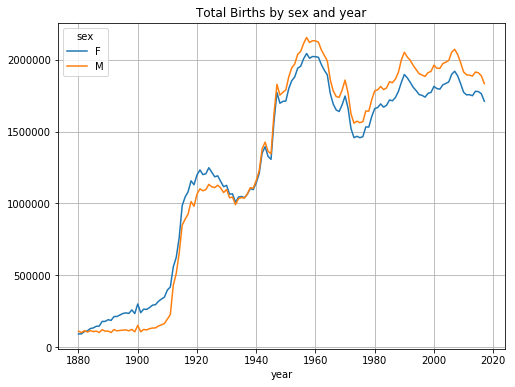

In [64]:
total_births.plot(title='Total Births by sex and year', figsize = (8,6),grid=True)
plt.savefig('totalBirthsSexYear')

We can noticed a peak of Births between 1958 and 1960. I don't know much about US history, it would be interesting to understand why.

# 4.Proportions of Births

Next, let’s insert a column prop with the fraction of babies given each name relative to
the total number of births. A prop value of 0.02 would indicate that 2 out of every
100 babies were given a particular name. Thus, we group the data by year and sex,
then add the new column to each group:

In [65]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)

In [66]:
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


Let's make sure that the prop column sums to 1 within all the groups:

In [67]:
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
      M      1.0
1883  F      1.0
      M      1.0
1884  F      1.0
      M      1.0
            ... 
2013  F      1.0
      M      1.0
2014  F      1.0
      M      1.0
2015  F      1.0
      M      1.0
2016  F      1.0
      M      1.0
2017  F      1.0
      M      1.0
Name: prop, Length: 276, dtype: float64

Now that this is done, let's extract a subset of the data to facilitate further
analysis: the top 1,000 names for each sex/year combination.

In [68]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
# Drop the group index, not needed
top1000.reset_index(inplace=True, drop=True)

In [69]:
top1000.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


We'll use this Top 1000 dataset for further investigations

# 5.Analyzing Naming Trends

In [70]:
total_births = top1000.pivot_table('births', index = 'year', columns = 'name', aggfunc=sum)
total_births.head()

name,Aaden,Aadhya,Aaliyah,Aanya,Aarav,Aaron,Aarush,Ab,Abagail,Abb,...,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri,Zyaire
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,...,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,...,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,...,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,...,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,...,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN,NaN


In [71]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 1880 to 2017
Columns: 7134 entries, Aaden to Zyaire
dtypes: float64(7134)
memory usage: 7.5 MB


In [72]:
top1000['name'].value_counts()

Jessie         276
Leslie         256
Guadalupe      252
Lee            249
James          248
John           247
Jean           247
William        247
Robert         245
Francis        238
              ... 
Nicol            1
Girtha           1
Shepard          1
Miguelangel      1
Hunt             1
Lurana           1
Marianita        1
Keion            1
Tallie           1
Ceasar           1
Name: name, Length: 7134, dtype: int64

In [73]:
def get_name_plot(subs):
    return subs.plot(subplots=True, figsize=(12,10), grid = True, title='Number of births per year')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F4346BAC8>,
      dtype=object)

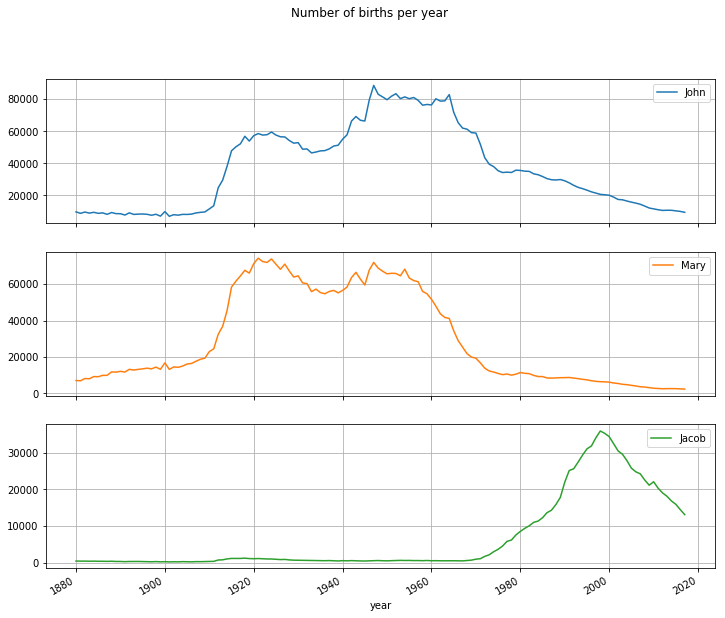

In [74]:
subset = total_births[['John','Mary','Jacob']]
get_name_plot(subset)

# 6.Baby named Kevin over Time

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F41FB20F0>],
      dtype=object)

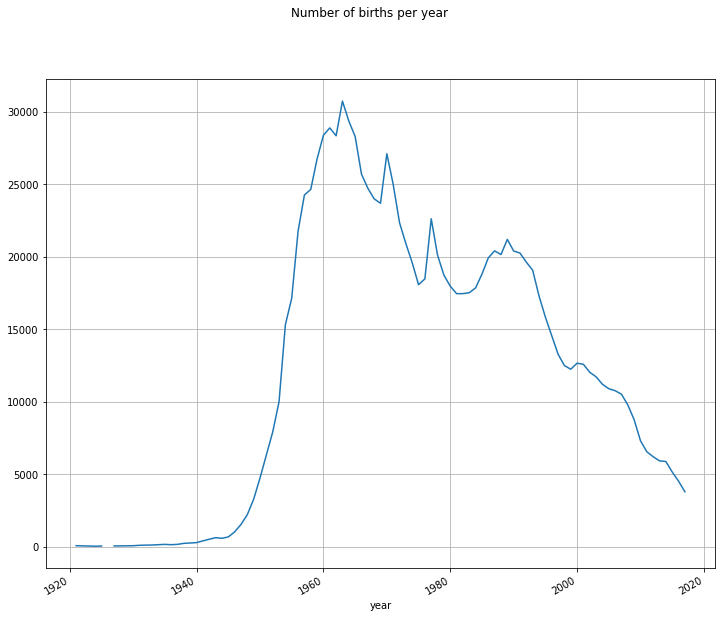

In [75]:
subset = total_births['Kevin']
get_name_plot(subset)

# 7.Measuring the increase in naming diversity

In [76]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)
table

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
1885,0.992251,0.995501
1886,0.989504,0.995035
1887,0.988279,0.996697
1888,0.984240,0.992429


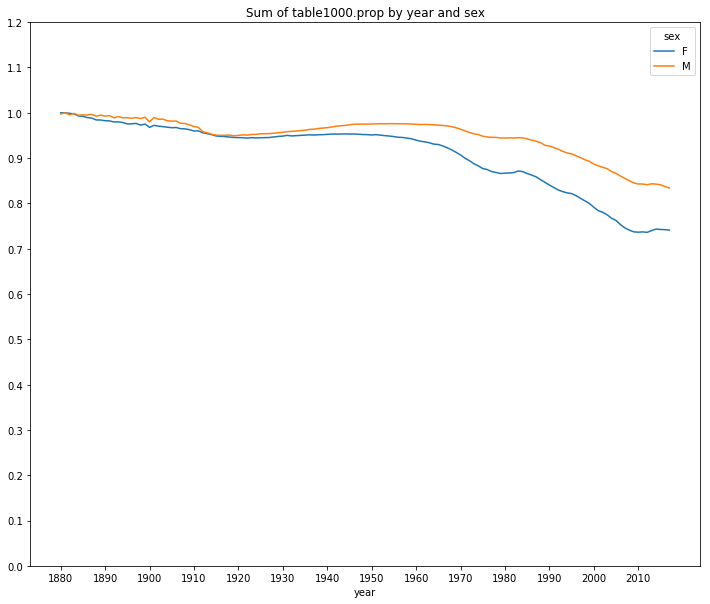

In [77]:
table.plot(title='Sum of table1000.prop by year and sex', figsize=(12,10),
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [78]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [79]:
df = boys[boys.year == 2017]
df

,name,sex,births,year,prop
274877,Liam,M,18728,2017,0.010209
274878,Noah,M,18326,2017,0.009990
274879,William,M,14904,2017,0.008124
274880,James,M,14232,2017,0.007758
274881,Logan,M,13974,2017,0.007617
274882,Benjamin,M,13733,2017,0.007486
274883,Mason,M,13502,2017,0.007360
274884,Elijah,M,13268,2017,0.007233
274885,Oliver,M,13141,2017,0.007163
274886,Jacob,M,13106,2017,0.007144


In [80]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [81]:
prop_cumsum[:10]

274877    0.010209
274878    0.020199
274879    0.028323
274880    0.036081
274881    0.043698
274882    0.051184
274883    0.058544
274884    0.065777
274885    0.072940
274886    0.080084
Name: prop, dtype: float64

In [82]:
prop_cumsum.values.searchsorted(0.5)

142

### It's about diversity

In [83]:
def get_quantile_count(group, q=0.5):
    group=group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q)+1

In [84]:
diversity = top1000.groupby(['year','sex']).apply(get_quantile_count)

diversity.head()

year  sex
1880  F      38
      M      14
1881  F      38
      M      14
1882  F      38
dtype: int64

In [85]:
diversity = diversity.unstack()
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


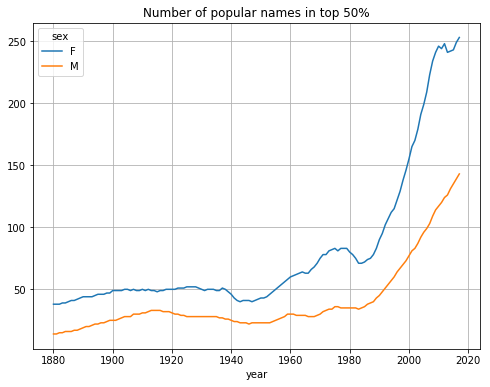

In [86]:
diversity.plot(title='Number of popular names in top 50%', figsize=(8,6), grid=True)